# **Grupo 1 - Machine Learning**
### **Integrantes**
### **u202218044 - Mayhua Hinostroza, José Antonio**
### **u202216120 - Manchay Paredes, Lucero Salome**
### **u20191e650 - Arquiñigo Jacinto, Ibrahim Imanol Jordi**

In [1]:
%pip install pandas matplotlib seaborn numpy scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\SeuNg720\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [54]:
#Incluya las principales librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


## **Analisis Exploratorio de Datos**

In [3]:
# Cargar datos
df = pd.read_csv('credit_card_transactions.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [5]:
df.describe()

,TransactionID,Amount,MCC,TransactionSpeed,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,547.347491,5950.102900,30.738446,0.019200
std,2886.89568,460.047329,664.526287,19.092345,0.137234
min,1.00000,10.090000,5261.000000,0.110000,0.000000
25%,2500.75000,263.222500,5411.000000,14.910000,0.000000
50%,5000.50000,512.240000,5812.000000,29.655000,0.000000
75%,7500.25000,759.935000,5968.000000,45.270000,0.000000
max,10000.00000,4988.070000,7299.000000,119.860000,1.000000


In [6]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [7]:
df.shape

(10000, 11)

In [8]:
df.isnull().sum()

TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64

In [9]:
df.duplicated().any()

np.False_

In [10]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns
columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns

In [11]:
print("Columnas Categoricas: ",columnas_categoricas)
print("Columnas Numericas: ",columnas_numericas)

Columnas Categoricas:  Index(['Time', 'CardholderName', 'MerchantName', 'Location', 'Device',
       'IPAddress'],
      dtype='object')
Columnas Numericas:  Index(['TransactionID', 'Amount', 'MCC', 'TransactionSpeed', 'Fraud'], dtype='object')


In [12]:
# Para variables categóricas
for col in ["CardholderName","MerchantName","Location","Device"]:
    print(col, ":", df[col].nunique(), "categorías")
    print(df[col].value_counts().head(), "\n")


CardholderName : 9439 categorías
CardholderName
Melissa Davis     5
Robert Smith      5
Kimberly Smith    4
Tyler Smith       4
Michael Brown     4
Name: count, dtype: int64 

MerchantName : 8677 categorías
MerchantName
Smith and Sons    17
Johnson Inc       14
Smith Group       14
Smith PLC         13
Jones Ltd         12
Name: count, dtype: int64 

Location : 7697 categorías
Location
West Michael     14
North Michael    10
East Michael      9
Lake Michael      9
East Daniel       8
Name: count, dtype: int64 

Device : 4 categorías
Device
Android    2556
Web        2537
POS        2471
iOS        2436
Name: count, dtype: int64 



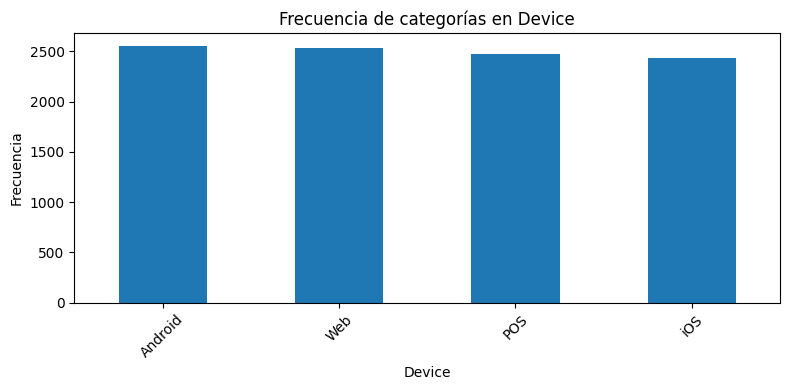

In [13]:
for col in ["Device"]:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de categorías en {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

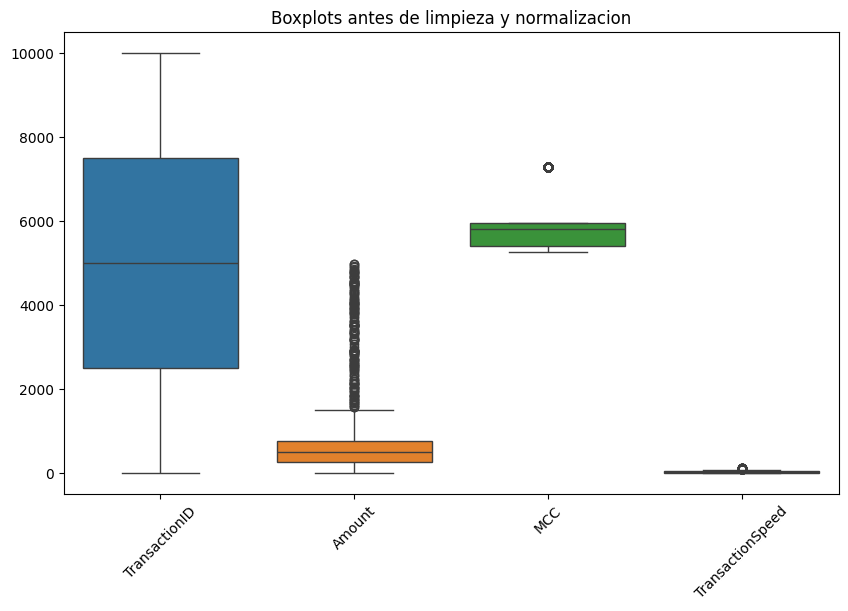

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[columnas_numericas].drop(columns=["Fraud"], axis=1))
plt.title("Boxplots antes de limpieza y normalizacion")
plt.xticks(rotation=45)
plt.show()

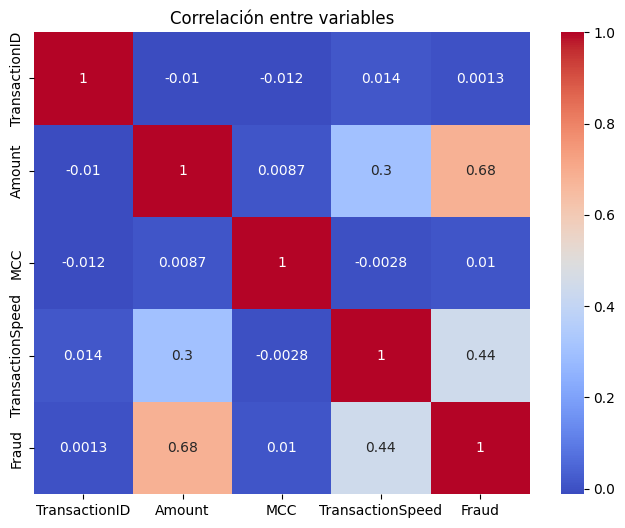

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

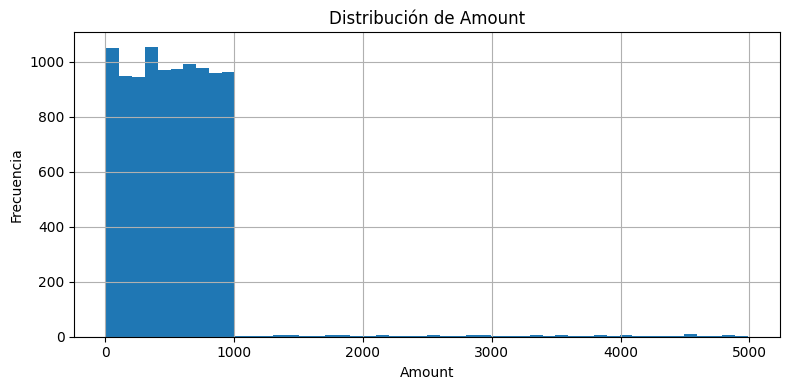

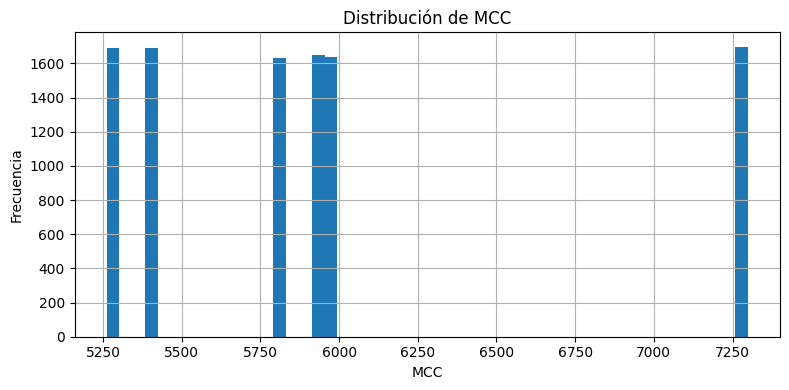

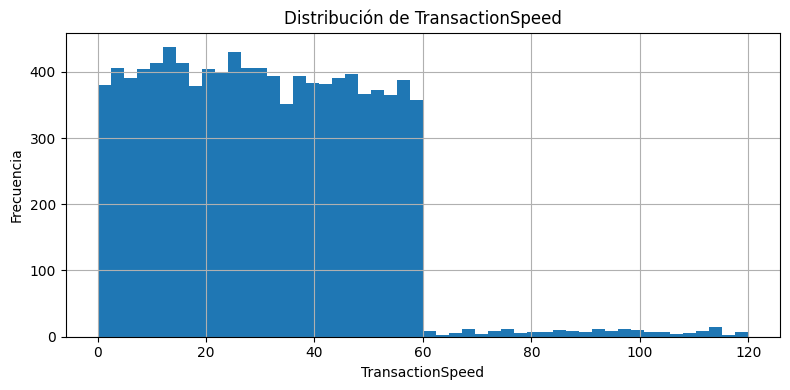

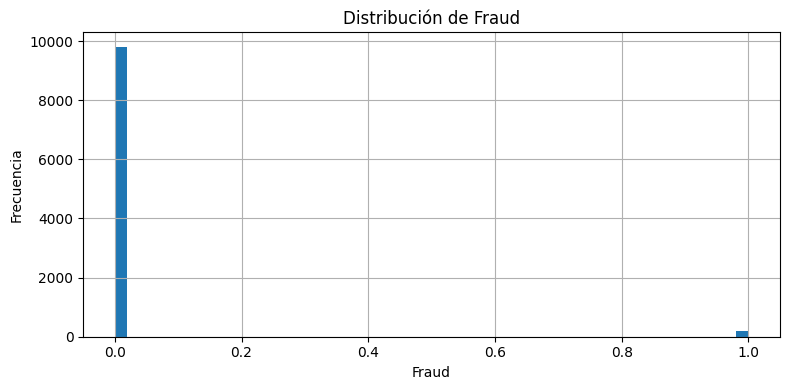

In [16]:
for col in columnas_numericas.drop(["TransactionID"]):
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=50)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Se puede determinar desbalances de clases en la columna Fraud, como se ve en el ultimo grafico.

## **PreProcesamiento**

In [17]:
df = df.drop(columns=["TransactionID"])

In [18]:
df["Time"] = pd.to_datetime(df["Time"])
df["hour"] = df["Time"].dt.hour
df["dow"]  = df["Time"].dt.dayofweek
df["year"]  = df["Time"].dt.year
df["month"]  = df["Time"].dt.month

In [19]:
df.head()

,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud,hour,dow,year,month
0,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0,6,6,2025,3
1,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0,5,4,2025,2
2,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0,15,4,2024,5
3,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0,9,4,2024,5
4,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0,17,3,2025,4


In [20]:
df = df.drop(columns=["Time"])

In [21]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns
columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns
print(columnas_categoricas)
print(columnas_numericas)

Index(['CardholderName', 'MerchantName', 'Location', 'Device', 'IPAddress'], dtype='object')
Index(['Amount', 'MCC', 'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year',
       'month'],
      dtype='object')


In [22]:
df["IP_octet_1"] = df["IPAddress"].str.split(".", expand=True)[0].astype(int)

df = df.drop(columns=["IPAddress"])

In [23]:
df.columns

Index(['Amount', 'CardholderName', 'MerchantName', 'MCC', 'Location', 'Device',
       'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year', 'month',
       'IP_octet_1'],
      dtype='object')

In [24]:
df.head()

,Amount,CardholderName,MerchantName,MCC,Location,Device,TransactionSpeed,Fraud,hour,dow,year,month,IP_octet_1
0,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,38.17,0,6,6,2025,3,102
1,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,49.84,0,5,4,2025,2,153
2,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,48.79,0,15,4,2024,5,151
3,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,8.71,0,9,4,2024,5,130
4,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,17.16,0,17,3,2025,4,195


In [25]:
def ip_class(ip):
    first_octet = int(ip)
    if 1 <= first_octet <= 126:
        return "A"
    elif 128 <= first_octet <= 191:
        return "B"
    elif 192 <= first_octet <= 223:
        return "C"
    else:
        return None


df["IPClass"] = df["IP_octet_1"].apply(ip_class)
df = df.drop(columns=["IP_octet_1"])

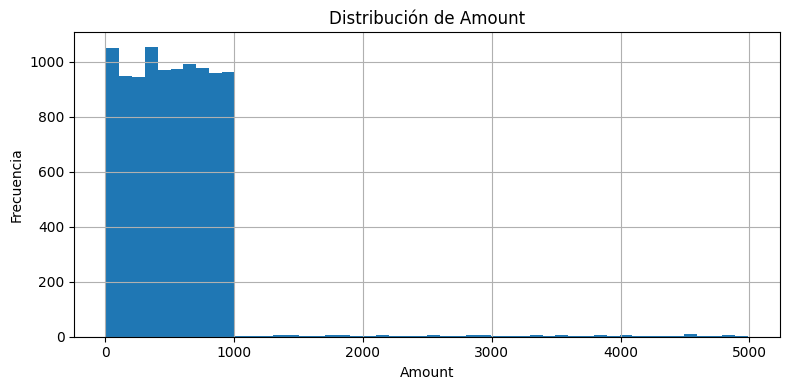

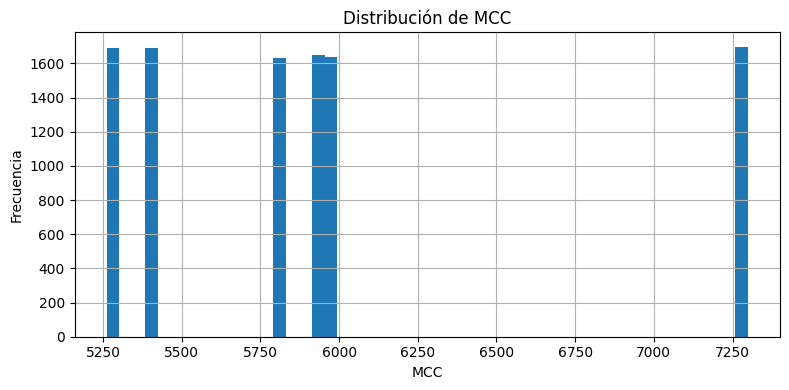

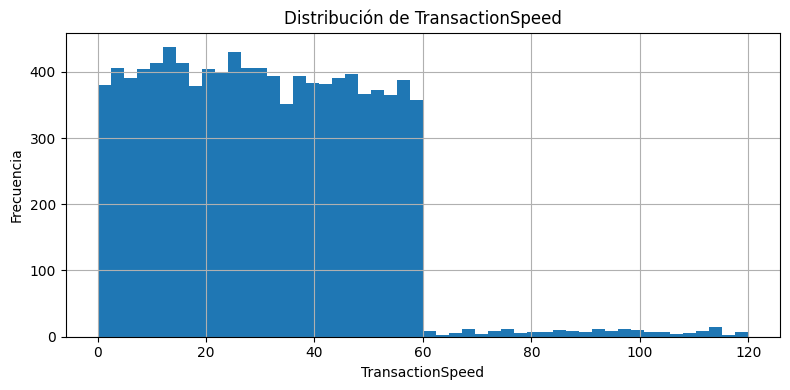

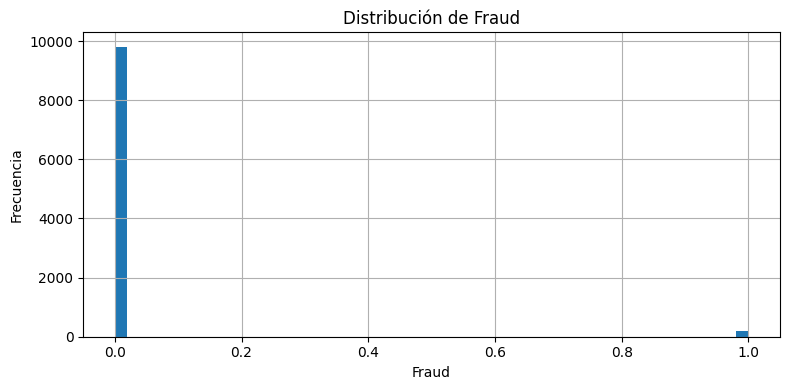

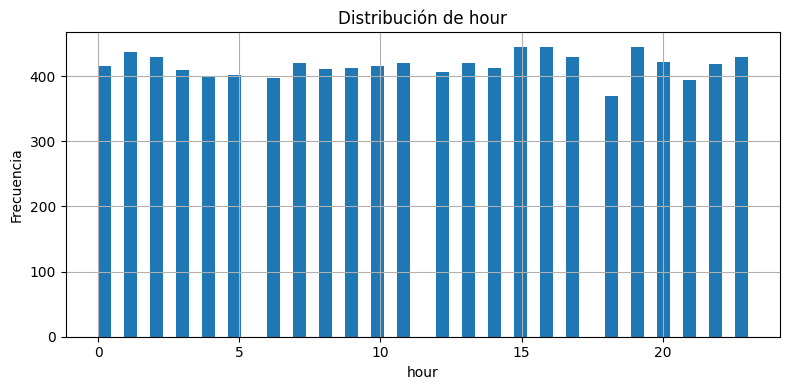

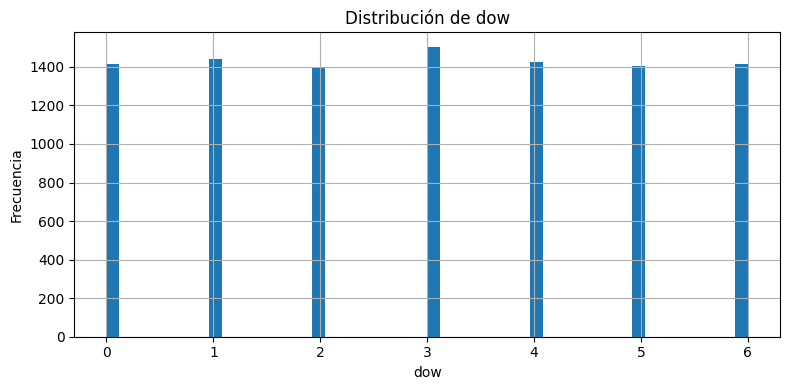

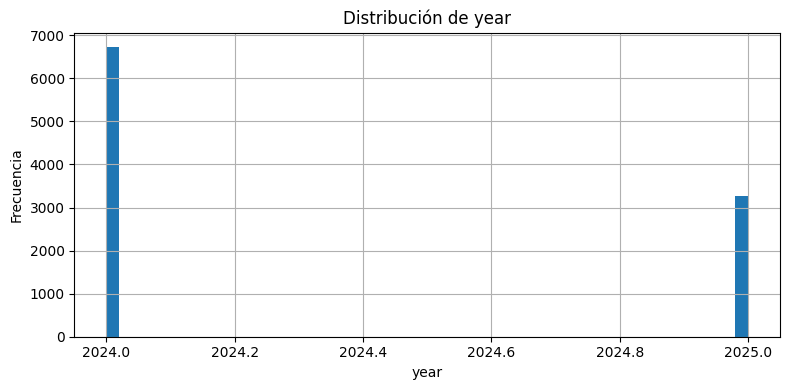

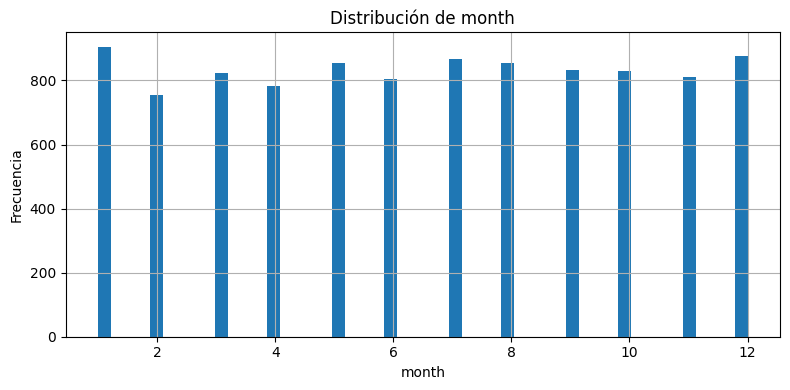

In [26]:
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=50)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

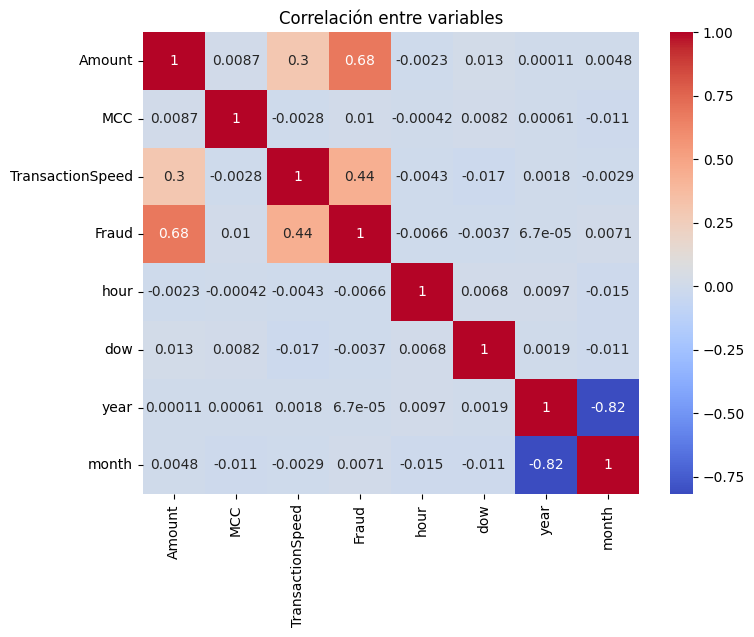

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

## **MinMax Scaler**

In [28]:
columnas_MinMaxScaler = columnas_numericas.drop(["MCC"])
print(columnas_MinMaxScaler)

Index(['Amount', 'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year', 'month'], dtype='object')


In [29]:
scaler = MinMaxScaler()
df[columnas_MinMaxScaler] = scaler.fit_transform(df[columnas_MinMaxScaler])

## **One Hot Encoding**

In [30]:
columnas_one_hot_encoding = columnas_categoricas.append(pd.Index(['MCC']))
columnas_one_hot_encoding = columnas_categoricas.append(pd.Index(['IPClass']))
columnas_one_hot_encoding = columnas_one_hot_encoding.drop(["IPAddress"])
print(columnas_one_hot_encoding)

Index(['CardholderName', 'MerchantName', 'Location', 'Device', 'IPClass'], dtype='object')


In [31]:
ohe = OneHotEncoder(handle_unknown="ignore")
cols_ohe = ohe.fit_transform(df[columnas_one_hot_encoding])
ohe_cols_names = ohe.get_feature_names_out(columnas_one_hot_encoding)
df_ohe = pd.DataFrame(cols_ohe.toarray(), columns=ohe_cols_names, index=df.index)
df = pd.concat([df.drop(columns = columnas_one_hot_encoding), df_ohe], axis=1)

In [32]:
print(df.columns)

Index(['Amount', 'MCC', 'TransactionSpeed', 'Fraud', 'hour', 'dow', 'year',
       'month', 'CardholderName_Aaron Alvarado', 'CardholderName_Aaron Austin',
       ...
       'Location_Zimmermanfurt', 'Location_Zimmermanmouth',
       'Location_Zimmermanview', 'Device_Android', 'Device_POS', 'Device_Web',
       'Device_iOS', 'IPClass_A', 'IPClass_B', 'IPClass_C'],
      dtype='object', length=25828)


In [33]:
# columnas_numericas = df.select_dtypes(include=[np.number]).columns
# columnas_categoricas = df.select_dtypes(exclude=[np.number]).columns
# print(columnas_categoricas)
# print(columnas_numericas)

## **Entrenamiento**

In [34]:
y = df["Fraud"]
X = df.drop(columns=["Fraud"])

In [35]:
X_train, X_resto, y_train, y_resto = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [36]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
vs = VarianceThreshold(threshold=0.01)
X_train = vs.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns[vs.get_support()])

In [38]:
X_resto = vs.transform(X_resto)
X_resto = pd.DataFrame(X_resto, columns=X.columns[vs.get_support()])

In [39]:
# Método 1: ANOVA F-value (para características continuas)
selector_f = SelectKBest(f_classif, k=10)  # Seleccionar top 10 características
selector_f.fit(X_train, y_train)
scores_f = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)
print("Top 10 características según ANOVA F-test:")
print(scores_f.head(10))

X_train_selected_f = selector_f.transform(X_train)
X_resto_selected_f = selector_f.transform(X_resto)

Top 10 características según ANOVA F-test:
             Feature       F_Score       P_Value
2   TransactionSpeed  52658.060107  0.000000e+00
0             Amount  29893.434429  0.000000e+00
6              month    107.933389  3.446081e-25
13         IPClass_C     86.344510  1.735890e-20
12         IPClass_B     75.006377  5.210240e-18
5               year     68.072014  1.718834e-16
3               hour     67.039251  2.894737e-16
8         Device_POS     32.595202  1.158436e-08
1                MCC     17.348269  3.130838e-05
7     Device_Android     12.336163  4.456945e-04


In [40]:
# Método 2: Información mutua (relaciones no lineales)
selector_mi = SelectKBest(mutual_info_classif, k=10)
selector_mi.fit(X_train, y_train)
scores_mi = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual_Info_Score': selector_mi.scores_
}).sort_values('Mutual_Info_Score', ascending=False)
print("\nTop 10 características según Información Mutua:")
print(scores_mi.head(10))

X_train_selected_mi = selector_mi.transform(X_train)
X_resto_selected_mi = selector_mi.transform(X_resto)


Top 10 características según Información Mutua:
             Feature  Mutual_Info_Score
2   TransactionSpeed           0.693184
0             Amount           0.626073
3               hour           0.551304
6              month           0.514978
4                dow           0.446143
5               year           0.094400
7     Device_Android           0.078438
10        Device_iOS           0.073083
11         IPClass_A           0.069640
8         Device_POS           0.063587


In [41]:
X_validacion, X_prueba, y_validacion, y_prueba = train_test_split(
    X_resto_selected_mi, y_resto, test_size=0.5, stratify=y_resto, random_state=42
)

## **MODELADO**

In [42]:
# Entrenar el modelo Naive Bayes
modelo_nb = GaussianNB()
modelo_nb.fit(X_train_selected_mi, y_train)

GaussianNB()

In [43]:
# Entrenar modelo MLP base con una capa oculta
modelo_mlp_base = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=300)
modelo_mlp_base.fit(X_train_selected_mi, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [44]:
# Definir la grilla de hiperparámetros para MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [300]
}

# Realizar búsqueda de mejores hiperparámetros (solo modelado, sin evaluación)
grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=3, scoring='accuracy', verbose=1)
grid_search_mlp.fit(X_train_selected_mi, y_train)

# Modelo MLP optimizado
modelo_mlp_optimizado = grid_search_mlp.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


## **EVALUACIÓN**

In [45]:
def evaluar_modelo(nombre, modelo, X_test, y_test):
    print(f"Evaluación del modelo: {nombre}")
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Fraude): {recall:.4f}")
    print(f"Precision (Fraude): {precision:.4f}")
    print(f"F1-score (Fraude): {f1:.4f}")
    print("Matriz de Confusión:")
    print(cm)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc_score:.4f})")
    return auc_score

Evaluación del modelo: Naive Bayes Gaussiano
Accuracy: 0.9987
Recall (Fraude): 0.9310
Precision (Fraude): 1.0000
F1-score (Fraude): 0.9643
Matriz de Confusión:
[[1471    0]
 [   2   27]]
Evaluación del modelo: MLP Optimizado
Accuracy: 0.9980
Recall (Fraude): 0.8966
Precision (Fraude): 1.0000
F1-score (Fraude): 0.9455
Matriz de Confusión:
[[1471    0]
 [   3   26]]


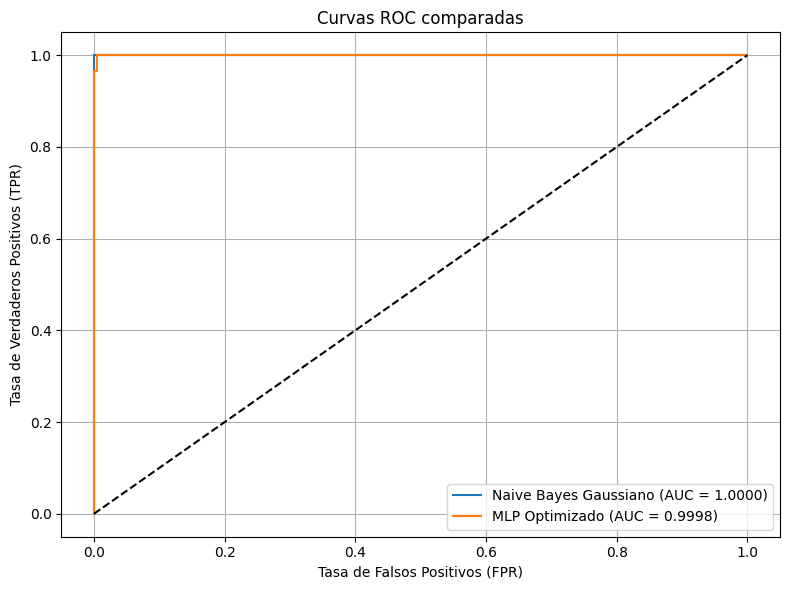

In [46]:
plt.figure(figsize=(8,6))
plt.title("Curvas ROC comparadas")

auc_nb = evaluar_modelo("Naive Bayes Gaussiano", modelo_nb, X_prueba, y_prueba)
auc_mlp = evaluar_modelo("MLP Optimizado", modelo_mlp_optimizado, X_prueba, y_prueba)

# Finalizar gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Evaluación del modelo: Naive Bayes Gaussiano
Accuracy: 0.9993
Recall (Fraude): 0.9655
Precision (Fraude): 1.0000
F1-score (Fraude): 0.9825
Matriz de Confusión:
[[1471    0]
 [   1   28]]
Evaluación del modelo: MLP Optimizado
Accuracy: 0.9993
Recall (Fraude): 0.9655
Precision (Fraude): 1.0000
F1-score (Fraude): 0.9825
Matriz de Confusión:
[[1471    0]
 [   1   28]]


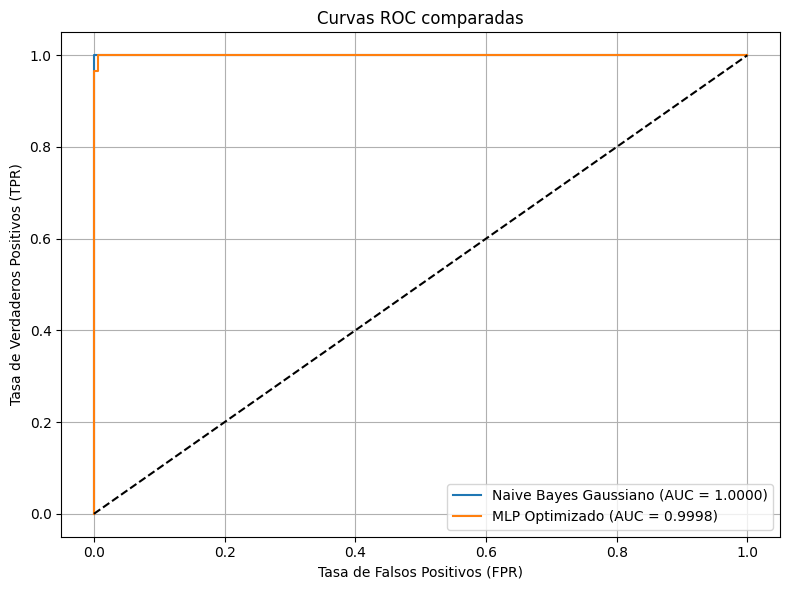

In [47]:
plt.figure(figsize=(8,6))
plt.title("Curvas ROC comparadas")

auc_nb = evaluar_modelo("Naive Bayes Gaussiano", modelo_nb, X_validacion, y_validacion)
auc_mlp = evaluar_modelo("MLP Optimizado", modelo_mlp_optimizado, X_validacion, y_validacion)

# Finalizar gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## **ANÁLISI Y CONCLUSIONES**

# Comparación del rendimiento
Al comparar ambos modelos (Naive Bayes Gaussiano y MLP Optimizado) en función de las métricas de evaluación y la curva ROC, se puede observar lo siguiente:

| Métrica            | Naive Bayes Gaussiano | MLP Optimizado  |
| ------------------ | --------------------- | --------------- |
| Accuracy           | 0.9908 – 0.9993       | 0.9908 – 0.9993 |
| Recall (Fraude)    | 0.8966 – 0.9655       | 0.8966 – 0.9655 |
| Precisión (Fraude) | 1.0000                | 1.0000          |
| F1-score (Fraude)  | 0.9455 – 0.9825       | 0.9455 – 0.9825 |
| AUC (curva ROC)    | 1.0000                | 0.9995 – 0.9997 |


Ambos modelos tienen un rendimiento muy alto. Las métricas son prácticamente iguales en los dos enfoques, lo cual demuestra que tanto el Naive Bayes como el Perceptrón Multicapa optimizado lograron detectar correctamente la mayoría de los casos de fraude.

Sin embargo, el Naive Bayes mostró un AUC ligeramente superior (1.0000), mientras que el MLP Optimizado alcanzó entre 0.9995 y 0.9997. Esta diferencia es mínima y no tiene impacto práctico significativo, pero es técnicamente notable.

# Fortalezas y debilidades

| Modelo                | Fortalezas                                                                                             | Debilidades                                                                                                            |
| --------------------- | ------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------- |
| Naive Bayes Gaussiano | - Rápido de entrenar y evaluar.<br>- AUC perfecto (1.000).<br>- Precisión máxima.                      | - Basado en supuestos fuertes (independencia entre variables).<br>- Puede ser sensible a la distribución de los datos. |
| MLP Optimizado        | - Capaz de modelar relaciones no lineales.<br>- Muy buen recall y F1-score.<br>- Buena generalización. | - Mayor costo computacional.<br>- Requiere ajuste de hiperparámetros.<br>- Ligeramente menor AUC.                      |


In [53]:
from sklearn.inspection import permutation_importance

# Evaluar importancia usando el conjunto de prueba
resultados = permutation_importance(modelo_mlp_optimizado, X_prueba, y_prueba, scoring='f1', n_repeats=10, random_state=42)

importancia = resultados.importances_mean
indices = importancia.argsort()[::-1]

# Mostrar las características más importantes
print("Características más importantes según MLP:")
for i in range(10):  # Top 10
    print(f"{X.columns[indices[i]]}: {importancia[indices[i]]:.4f}")

Características más importantes según MLP:
MCC: 0.5800
Amount: 0.2455
year: 0.0068
CardholderName_Aaron Bernard: 0.0000
hour: 0.0000
TransactionSpeed: 0.0000
month: -0.0056
CardholderName_Aaron Alvarado: -0.0056
CardholderName_Aaron Austin: -0.0130
dow: -0.0149


In [57]:
# Evaluar importancia usando el conjunto de prueba
resultados = permutation_importance(modelo_mlp_optimizado, X_prueba, y_prueba, scoring='f1', n_repeats=10, random_state=42)

importancia = resultados.importances_mean
indices = importancia.argsort()[::-1]

# Mostrar las características más importantes
print("Características más importantes según MLP:")
for i in range(10):  # Top 10
    print(f"{X.columns[indices[i]]}: {importancia[indices[i]]:.4f}")

Características más importantes según MLP:
MCC: 0.5800
Amount: 0.2455
year: 0.0068
CardholderName_Aaron Bernard: 0.0000
hour: 0.0000
TransactionSpeed: 0.0000
month: -0.0056
CardholderName_Aaron Alvarado: -0.0056
CardholderName_Aaron Austin: -0.0130
dow: -0.0149


### **Recomendaciones para mejorar el sistema de detección de fraude**

##### 1. Además del MLP y Naive Bayes, se recomienda explorar algoritmos más robustos como Random Forest, XGBoost o SVM, que suelen ofrecer buen rendimiento en tareas de clasificación binaria.

##### 2. Detectar y tratar valores atípicos antes del entrenamiento puede reducir errores de clasificación y aumentar la estabilidad y precisión del modelo.

##### 3. Reentrenar el modelo de manera periódica con datos recientes es fundamental, ya que los patrones de fraude evolucionan constantemente.

##### 4. Evaluar el desempeño del modelo con diferentes umbrales permite optimizar el equilibrio entre precisión y recall, según el impacto de los falsos positivos y negativos.

##### 5. Diseñar nuevas variables que reflejen mejor los comportamientos asociados al fraude (como la frecuencia de compras, montos inusuales o transacciones en horarios atípicos) puede mejorar significativamente la capacidad predictiva del modelo.